Here , I will implement linear Regression using only numpy 

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression



Cost function

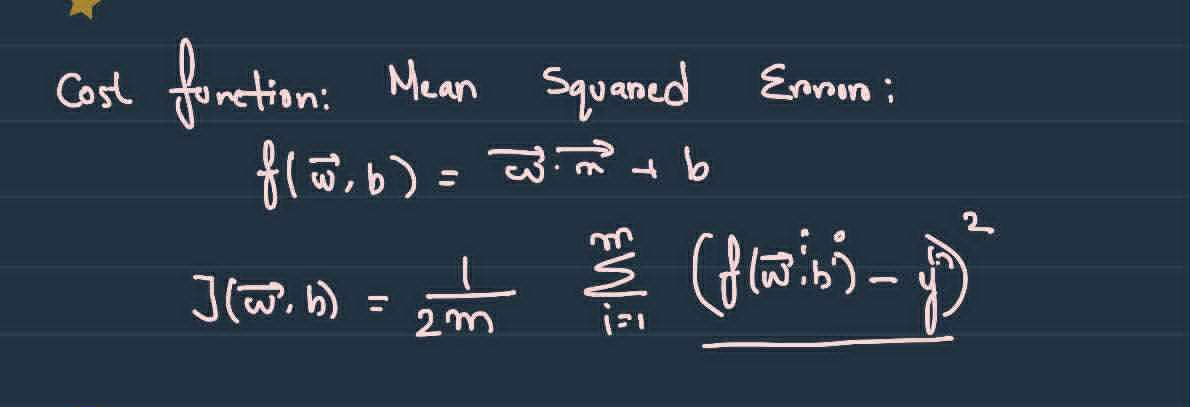

In [9]:
def cost_function(X, Y , W, b):
    '''
    X = the training dataframe (m x n)
    Y = the label (m x 1)
    W = weights of the model (n x 1)
    b = the bias term  
    '''
    # loss =  0
    # for i in range (X.shape[0]):
    #     x = X.iloc[i].to_numpy()
    #     x = np.dot(x,W) + b 
    #     l = (x-Y[i])**2
    #     loss += l
    # loss = (1/(2*X.shape[0]))*loss
    m = X.shape[0]
    pred = X.dot(W) + b
    l = pred - Y
    loss = np.sum(l**2)
    loss = (1/(2*m))* loss 
    return loss



Computing gradient :

In [10]:
def gradient(X, Y , W , b):
    m = X.shape[0]
    pred = X.dot(W) + b 
    errors = (1/m)*(pred - Y)
    grad_b = np.sum(errors)
    grad_w = X.T.dot(errors) # basically does the sum , fixing a feature

    return grad_w , grad_b

    

Gradient Descendt:

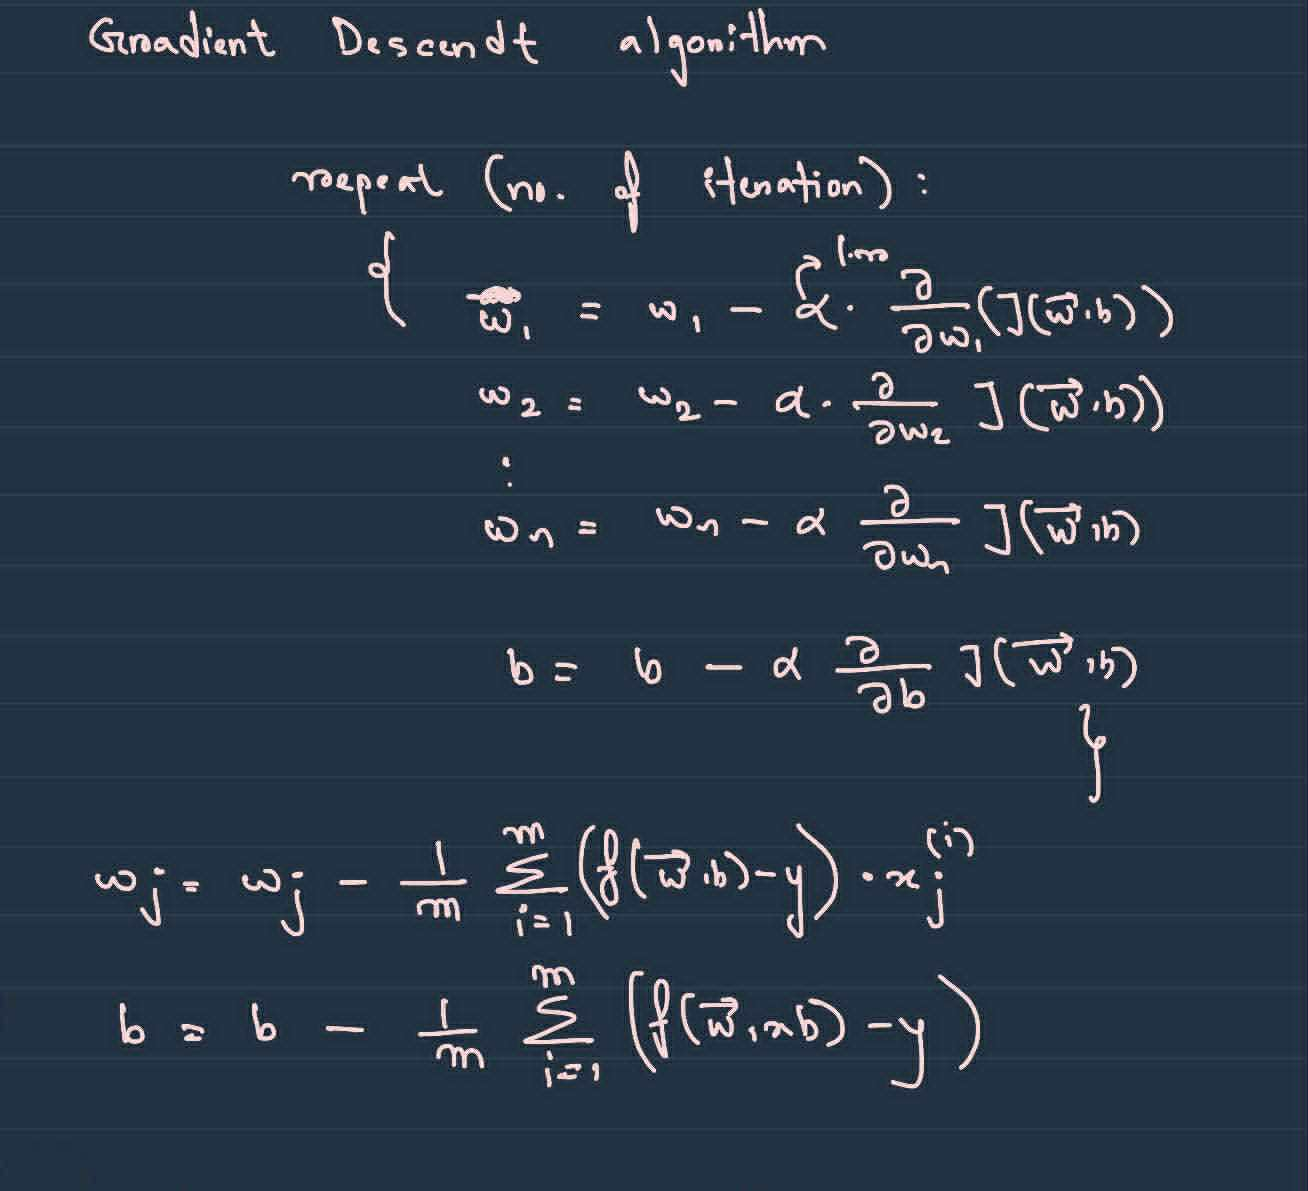

In [11]:
def gradient_descendt(X, Y , W , b,iterations=10000, lr=1e-3):

    cost_history =[]
    for i in range(iterations):
        if (i % 100 == 0) :
            cost = cost_function(X, Y, W, b)
            print("Cost : ", cost)
            cost_history.append(cost)
        gradW, gradb = gradient(X,Y, W, b)
        W = W - (lr*gradW)
        b = b -(lr*gradb)

    return W, b 
    

Testing the model : 

In [12]:

X, Y = make_regression(n_samples=1000, n_features=6, noise=5, random_state=42)
feature_names = [f"feature{i+1}" for i in range(X.shape[1])]
X_df = pd.DataFrame(X, columns=feature_names)
w = np.zeros(X_df.shape[1])

W_set, bs =gradient_descendt(X_df, Y ,w, 0, 100000)

print("Estimated parameters (w) : ", W_set)
print(bs)

Cost :  6175.761253304124
Cost :  5072.298118888127
Cost :  4167.601885669376
Cost :  3425.637094002114
Cost :  2816.946308854723
Cost :  2317.4406536193155
Cost :  1907.4143933914988
Cost :  1570.741743845406
Cost :  1294.22194988317
Cost :  1067.04505467323
Cost :  880.3559494349104
Cost :  726.8984874786777
Cost :  600.7248484703803
Cost :  496.95810090120136
Cost :  411.59815379561695
Cost :  341.36311104182465
Cost :  283.55952289991836
Cost :  235.97623360427104
Cost :  196.7975036619134
Cost :  164.53188269682443
Cost :  137.9539577379159
Cost :  116.0566304578656
Cost :  98.01200756198698
Cost :  83.13933957795288
Cost :  70.87872954767745
Cost :  60.76956662455311
Cost :  52.43283012630156
Cost :  45.556565147198626
Cost :  39.8839578676886
Cost :  35.20354248186147
Cost :  31.341156480963434
Cost :  28.153330374737234
Cost :  25.52185464530597
Cost :  23.349313127479633
Cost :  21.5554099836012
Cost :  20.073948530715164
Cost :  18.85034563962688
Cost :  17.83958628495371
Cos

Visualizing the performannce :

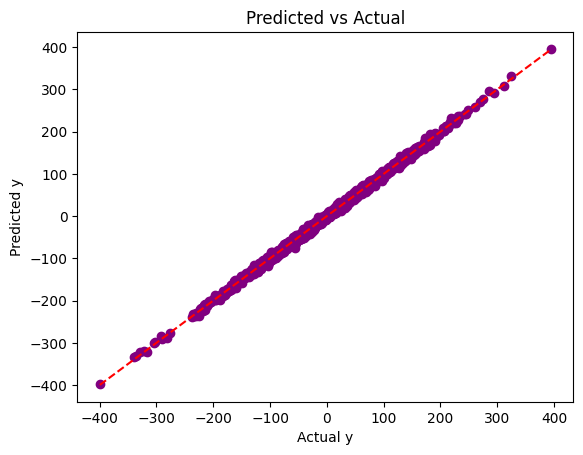

In [16]:
import matplotlib.pyplot as plt

# Convert DataFrame to NumPy and compute predictions
X_np = X_df.to_numpy()
y_pred = X_np.dot(W_set) + bs

plt.scatter(Y, y_pred, color="purple")
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Predicted vs Actual")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--')  # perfect fit line
plt.show()


As we can see, the model works quite well